In [1]:
#importamos librerías
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#cargamos los datos
black_data = pd.read_csv("BlackFriday.csv")
black_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
#visualizamos las variables numéricas de los datos
black_data.describe()
#verificamos los tipos de valor en cada celda
black_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [4]:
cat_values = ["Gender", "Age", "Occupation", "City_Category", "Marital_Status", "Product_Category_1", 
              "Product_Category_2", "Product_Category_3"]
for column in cat_values:
    black_data[column] = black_data[column].astype('category')
black_data.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category_1            category
Product_Category_2            category
Product_Category_3            category
Purchase                         int64
dtype: object

In [5]:
#Suma de valores pérdidos en cada columna. Pandas reconoce tanto una celda vacía como el valor NA como NaN
#https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b
black_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
#verificamos si hay valores pérdidos con otras sintaxis
#lista con valores NA comunes
missing_values = ["n/a", "na", "--", "Na"]
black_data = pd.read_csv("BlackFriday.csv", na_values= missing_values)
black_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [7]:
#verificamos la correlación entre variables para verificar si las variables con valores pérdidos tienen alguna 
#correlación alta con otra variables
black_data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


In [8]:
#verificamos el nro de filas que tienen valores pérdidos en las 2 variables
len(black_data[black_data['Product_Category_2'].isnull() & black_data['Product_Category_2'].isnull()])


166986

<Container object of 18 artists>

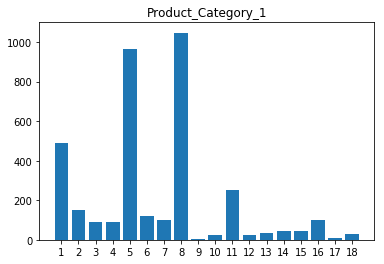

In [9]:
#verificamos la distribución de Product_Category_1 para comparar con los valores pérdidos de Product_Category_2 y
#Product_Category_3
prod_1 = black_data['Product_ID'].groupby(black_data['Product_Category_1']).nunique()
prod_2 = black_data['Product_ID'].groupby(black_data['Product_Category_2']).nunique()
prod_3 = black_data['Product_ID'].groupby(black_data['Product_Category_2']).nunique()
prod_1

bins = np.sort(black_data['Product_Category_1'].unique())
plt.xticks(bins)
plt.title('Product_Category_1')
plt.bar(bins, prod_1)

In [10]:
prod_2
prod_3

Product_Category_2
2.0     127
3.0      12
4.0     146
5.0     128
6.0      60
7.0       4
8.0     353
9.0      20
10.0     14
11.0     70
12.0     45
13.0     51
14.0    317
15.0    138
16.0    221
17.0     76
18.0     18
Name: Product_ID, dtype: int64

In [11]:
#sustituimos los valores pérdidos de Product_category_2 y Product_Categori_3 por 0
bf_data = black_data.fillna(0)
bf_data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
bf_data['Marital_Status'].unique()

array([0, 1])

In [ ]:
#Representamos el gráfico de cajas de la variable "Purchase" y vemos que existen valores extremos 
plt.figure(figsize=[30,10])
plt.subplot(231)
cajas = plt.boxplot(x=bf_data['Purchase'], showmeans = True, meanline = True)
plt.title('Purchase Boxplot')
plt.ylabel('Purchase ($)')

In [ ]:
# Almacenamos los valores extremos en una lista
outliers = list(cajas["fliers"][0].get_data()[1])

# Comprobamos la longitud para ver cuántos registros se consideran extremos.
print "Num. extremos", len(outliers)
print "Num. total", len(bf_data)

# Borramos los datos extremos
bf_data = bf_data[~bf_data.Purchase.isin(outliers)]

# Comparamos las longitudes antes y después
print "Num. sin extremos", len(bf_data)

In [ ]:
# (solo informativo)

# Número de valores diferentes por campo
print('Número de valores distintos: \n')
for i in bf_data.columns:
    print i, ':',bf_data[i].nunique()
    
# Tipo de datos de cada campo
print('\nTipo de datos: \n')
print (bf_data.info())

# Matriz de covarianzas 
print('\nMatriz de covarianzas: \n')
bf_data.cov()

In [13]:
stats.shapiro(bf_data['Purchase'][bf_data['Marital_Status']==1])

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9506862163543701, 0.0)

In [18]:
stats.spearmanr(bf_data['Age'], bf_data['Gender'])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=-0.00580105074616023, pvalue=2.106096006331249e-05)

(array([ 32175.,  57237., 130109., 104444.,  79179.,  24980.,  63928.,
         13437.,  29772.,   2316.]),
 array([  185. ,  2562.6,  4940.2,  7317.8,  9695.4, 12073. , 14450.6,
        16828.2, 19205.8, 21583.4, 23961. ]),
 <a list of 10 Patch objects>)

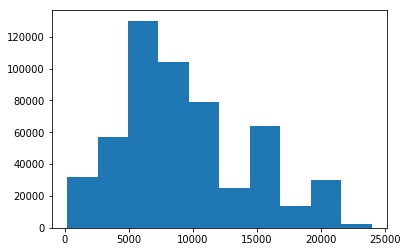

In [16]:
plt.hist(bf_data['Purchase'])

In [17]:
stats.fligner(bf_data['Purchase'], bf_data['Purchase'][bf_data['Gender']=='F'])

FlignerResult(statistic=1012.9321628625678, pvalue=2.7752221134490695e-222)